In [2]:
from pytriqs.utility.redirect import start_redirect
start_redirect()

# Perturbation order histograms

To analyze the behaviour of the Markov chain in CTHYB the perturbation order histograms are a central tool. This is a simple example showing how to sample and plot these histograms.

As an example we solve the one-orbital Anderson impurity at inverse temperature $\beta$, embedded in a flat (Wilson) bath with non-interacting Green's function $G^{-1}_{0,\sigma} (i\omega_n) = i \omega_n - \epsilon_f - V^2 \Gamma_\sigma(i \omega_n)$, and local interaction $H_\mathrm{int} = U n_\uparrow n_\downarrow$, where $U$ is the Hubbard interaction, $\epsilon_f$ is the local energy. The bath $\Gamma$, and the bath has bandwidth $D$ and hybridization $V$. 

In [16]:
from pytriqs.operators import n
from pytriqs.archive import HDFArchive
from pytriqs.gf import inverse, iOmega_n, Wilson

from triqs_cthyb import Solver

U, e_f, D, V, beta = 2., -1., 1., 1., 20.
Sz = 0.5 * ( n('up', 0) - n('down', 0) )

S = Solver(
    beta=beta, gf_struct=[('up',[0]), ('down',[0])],
    n_tau=400, n_iw=50,)

S.G0_iw << inverse(iOmega_n - e_f - V**2 * Wilson(D))

S.solve(
    h_int=U*n('up',0)*n('down',0),
    n_cycles=100000,
    length_cycle=20,
    n_warmup_cycles=100,
    measure_G_tau=False,
    measure_pert_order=True,
    )


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
(-1,0)*c_dag('down',0)*c('down',0) + (-1,0)*c_dag('up',0)*c('up',0) + (2,0)*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...

Accumulating ...
18:28:14   0% ETA 00:00:17 cycle 553 of 100000
18:28:16  14% ETA 00:00:12 cycle 14369 of 100000
18:28:18  31% ETA 00:00:10 cycle 31311 of 100000
18:28:21  51% ETA 00:00:07 cycle 51897 of 100000
18:28:25  78% ETA 00:00:03 cycle 78024 of 100000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure                   | seconds   
Average sign              | 0.0107962 
Perturbation order        | 0.0153839 
Perturbation order (down) | 0.0125549 
Perturbation order (up)   | 0.0118004 
Total measure time        | 0.0505354 
[Rank 0] Acceptance ra

### Plotting perturbation order histograms

The measured histograms are available as the member properties ``S.perturbation_order`` and ``S.perturbation_order_total`` of the cthyb solver.

For an ergodic Markov chain with sufficient number of warmup sweeps, the perturbation order distribution should be approximately Gaussian (or Possonian for low average orders).

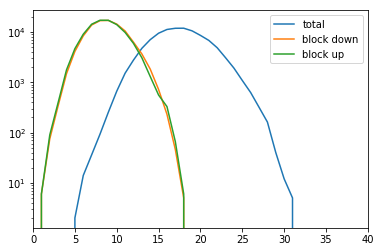

In [21]:
from pytriqs.plot.mpl_interface import oplot, oplotr, plt

oplot(S.perturbation_order_total, label='total')
for b in S.perturbation_order:
    oplot(S.perturbation_order[b], label='block {:s}'.format(b))

plt.semilogy([], [])
plt.xlim([0, 40]);

The total average perturbation order is important information to determine the ``length_cycle`` parameter that controls the number of attempted moves between measurements. To ensure low correlation between measurements the ``length_cycle`` should be high enough that the attempted moves can significanty change the configuration.

Autor: H. U.R. Strand (2019)